# Machine Learning in TensorFlow

### Brief Review of Machine Learning

In supervised learning, parametric models are those where the model is a function of a fixed form with a number of unknown _parameters_.  Together with a loss function and a training set, an optimizer can select parameters to minimize the loss with respect to the training set.  Common optimizers include stochastic gradient descent.  It tweaks the parameters slightly to move the loss "downhill" due to a small batch of examples from the training set.

### Linear & Logistic Regression

You've likely seen linear regression before.  In linear regression, we fit a line (technically, hyperplane) that predicts a target variable, $y$, based on some features $x$.  The form of this model is affine (even if we call it "linear"):  

$$y_{hat} = xW + b$$

where $W$ and $b$ are weights and an offset, respectively, and are the parameters of this parametric model.  The loss function that the optimizer uses to fit these parameters is the squared error ($||\cdots||_2$) between the prediction and the ground truth in the training set.

You've also likely seen logistic regression, which is tightly related to linear regression.  Logistic regression also fits a line - this time separating the positive and negative examples of a binary classifier.  The form of this model is similar: 

$$y_{hat} = \sigma(xW + b)$$

where again $W$ and $b$ are the parameters of this model, and $\sigma$ is the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) which maps un-normalized scores ("logits") to values $\hat{y} \in [0,1]$ that represent probabilities. The loss function that the optimizer uses to fit these parameters is the [cross entropy](../a1/information_theory.ipynb) between the prediction and the ground truth in the training set.

This pattern of an affine transform, $xW + b$, occurs over and over in machine learning.

### Preliminaries...

Before we do anything else, let's load our data and take a quick look at it.  In this example, we're going to build a (very) simple binary classifier based on two floating point features.

In [1]:
import data
%matplotlib inline
from matplotlib import pyplot as plt

(2500, 2)
(500, 2)


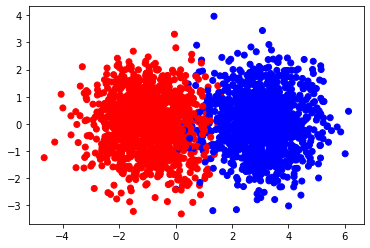

In [2]:
X_train, y_train, X_test, y_test = data.generate_data(2500, 500) #large test size to make diagrams better
print(X_train.shape)
print(X_test.shape)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr');

In [5]:
print(X_train[0:2])

[[ 2.35949754 -0.12385485]
 [-0.50121902 -0.9283033 ]]


### Training Logistic Regression

It's clear that the data is separable with a vertical line.  The simplest model we can use for this data is logistic regression.  Let's do that.

In [6]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.3.1


In [7]:
#####
## MAKE SURE YOU UNDERSTAND THIS CODE!!
##
## Look up keras.Sequential and keras.layers.Dense!
##
## You will need to use them to write your own model down below!
#####

# Sequential models are ones where the set of specified layers are stacked each on top of the previous.
linear_model = keras.Sequential([
    # Dense is an affine (xW + b) layer followed by an element wise nonlinearity.
    keras.layers.Dense(1, activation='sigmoid')
])

# adam optimizer is a fancier version of gradient descent. You can read more about it here: https://arxiv.org/pdf/1412.6980.pdf
linear_model.compile(optimizer='adam',
              loss='binary_crossentropy',  # From information theory notebooks.
              metrics=['accuracy'])        # What metric to output as we train.

linear_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 857us/step - loss: 2.5309 - accuracy: 0.0908
Epoch 2/100
79/79 [==============================] - 0s 946us/step - loss: 2.3795 - accuracy: 0.0860
Epoch 3/100
79/79 [==============================] - 0s 785us/step - loss: 2.2300 - accuracy: 0.0836
Epoch 4/100
79/79 [==============================] - 0s 747us/step - loss: 2.0838 - accuracy: 0.0764
Epoch 5/100
79/79 [==============================] - 0s 734us/step - loss: 1.9424 - accuracy: 0.0712
Epoch 6/100
79/79 [==============================] - 0s 709us/step - loss: 1.8053 - accuracy: 0.0672
Epoch 7/100
79/79 [==============================] - 0s 861us/step - loss: 1.6743 - accuracy: 0.0644
Epoch 8/100
79/79 [==============================] - 0s 620us/step - loss: 1.5474 - accuracy: 0.0600
Epoch 9/100
79/79 [==============================] - 0s 709us/step - loss: 1.4271 - accuracy: 0.0556
Epoch 10/100
79/79 [==============================] - 0s 798us/step - loss: 1.3150 - accura

79/79 [==============================] - 0s 848us/step - loss: 0.0948 - accuracy: 0.9752
Epoch 82/100
79/79 [==============================] - 0s 810us/step - loss: 0.0936 - accuracy: 0.9752
Epoch 83/100
79/79 [==============================] - 0s 696us/step - loss: 0.0924 - accuracy: 0.9752
Epoch 84/100
79/79 [==============================] - 0s 734us/step - loss: 0.0913 - accuracy: 0.9756
Epoch 85/100
79/79 [==============================] - 0s 873us/step - loss: 0.0902 - accuracy: 0.9756
Epoch 86/100
79/79 [==============================] - 0s 753us/step - loss: 0.0891 - accuracy: 0.9752
Epoch 87/100
79/79 [==============================] - 0s 734us/step - loss: 0.0881 - accuracy: 0.9756
Epoch 88/100
79/79 [==============================] - 0s 709us/step - loss: 0.0871 - accuracy: 0.9752
Epoch 89/100
79/79 [==============================] - 0s 759us/step - loss: 0.0861 - accuracy: 0.9756
Epoch 90/100
79/79 [==============================] - 0s 810us/step - loss: 0.0852 - accuracy: 

**Hint:** You should expect to see an initial loss here of 0.3 - 1.2.  This is because a well-initialized random classifier tends to output a uniform distribution.  For each example in the batch, we either compute the cross-entropy loss of the label (`[1, 0]` or `[0, 1]`) against the model's output (`~[0.5, 0.5]`).  Both cases result in $-\lg(0.5) = lg(2) = 1.0$.

Of course, your random classifier won't output exactly uniform distributions (it's random after all), but you should anticipate it being pretty close.  If it's not, your initialization may be broken and make it hard for your network to learn.

**[Optional]** Some technical details... if your randomly initialized network is outputting very confident predictions, the loss computed may be very large while at the same time the sigmoids in the network are likely in saturation, quickly shrinking gradients.  The result is that you make tiny updates in the face of a huge loss.

Let's use our model to make predictions on the test set:

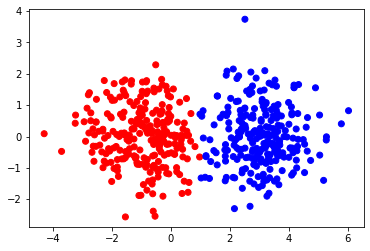

In [8]:
predictions = linear_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

### But what about a harder problem?

The case above, the data was linearly separable making it susceptible to a linear classifier.

But what if you had data that looked more like this?

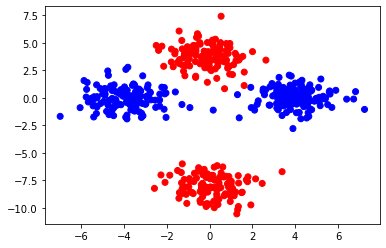

In [9]:
X_train, y_train, X_test, y_test = data.generate_non_linear_data(2500, 500)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='bwr')

In [10]:
linear_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 1ms/step - loss: 2.6991 - accuracy: 0.6724
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 2.3659 - accuracy: 0.6744
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 2.1324 - accuracy: 0.6764
Epoch 4/100
79/79 [==============================] - 0s 1ms/step - loss: 1.9460 - accuracy: 0.6824
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 1.7835 - accuracy: 0.6840
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 1.6395 - accuracy: 0.6880
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 1.5090 - accuracy: 0.6896
Epoch 8/100
79/79 [==============================] - 0s 1ms/step - loss: 1.3900 - accuracy: 0.6896
Epoch 9/100
79/79 [==============================] - 0s 1ms/step - loss: 1.2796 - accuracy: 0.6952
Epoch 10/100
79/79 [==============================] - 0s 1ms/step - loss: 1.1777 - accuracy: 0.6948
Epoch 11/

79/79 [==============================] - 0s 865us/step - loss: 0.6668 - accuracy: 0.6436
Epoch 82/100
79/79 [==============================] - 0s 772us/step - loss: 0.6667 - accuracy: 0.6468
Epoch 83/100
79/79 [==============================] - 0s 760us/step - loss: 0.6668 - accuracy: 0.6460
Epoch 84/100
79/79 [==============================] - 0s 730us/step - loss: 0.6668 - accuracy: 0.6436
Epoch 85/100
79/79 [==============================] - 0s 684us/step - loss: 0.6668 - accuracy: 0.6388
Epoch 86/100
79/79 [==============================] - 0s 886us/step - loss: 0.6668 - accuracy: 0.6368
Epoch 87/100
79/79 [==============================] - 0s 785us/step - loss: 0.6669 - accuracy: 0.6496
Epoch 88/100
79/79 [==============================] - 0s 684us/step - loss: 0.6670 - accuracy: 0.6472
Epoch 89/100
79/79 [==============================] - 0s 736us/step - loss: 0.6668 - accuracy: 0.6548
Epoch 90/100
79/79 [==============================] - 0s 671us/step - loss: 0.6668 - accuracy: 

Again, let's make predictions on the test set...

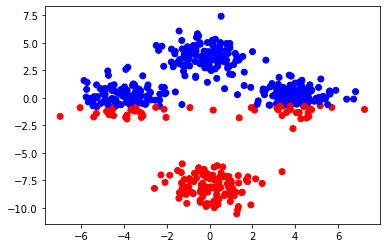

In [11]:
predictions = linear_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

That isn't very good!

### Building a deeper network

Ok, now it's your turn.  Build a deeper neural network below.  Try to achieve a loss less than 0.05.  Initialization is random, but try to make it happen "almost" always.

In [17]:
X_train.shape

(2500, 2)

In [32]:
dropout = 0.0
num_neurons = 4 #5 #10

deep_model = keras.Sequential([
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs wider networks:
    #   What's the minimum number of hidden layers you can get away with?
    #   Conversely, what's the smallest hidden vector dimensions you can use if you use more hidden layers?

    ### YOUR CODE HERE
    
    # Let's go nuts in terms of layers and neurons per layer and actively try to overfit
        
    # Add 5 densely-connected layers with num_neurons units followed by dropout to the model:
    
    keras.layers.Dense(num_neurons, activation='relu',
                 #kernel_initializer=tf.keras.initializers.glorot_normal ,
                 input_shape=(2,)),         # '20' is the number of features of the input

    # add a droput layer
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),
        
    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),
    
    
    ### END YOUR CODE
    
    # Think about why you still use a sigmoid at the top of your network.
    keras.layers.Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 3ms/step - loss: 1.5614 - accuracy: 0.4968
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 1.2399 - accuracy: 0.4968
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.9995 - accuracy: 0.4976
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.8183 - accuracy: 0.5036
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5224
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.5588
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.6156
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.6804
Epoch 9/100
79/79 [==============================] - 0s 3ms/step - loss: 0.3996 - accuracy: 0.7160
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.7408
Epoch 11/

79/79 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9948
Epoch 82/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9952
Epoch 83/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9952
Epoch 84/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9952
Epoch 85/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9952
Epoch 86/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9952
Epoch 87/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9952
Epoch 88/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9952
Epoch 89/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9952
Epoch 90/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9952
Epoch 91/100


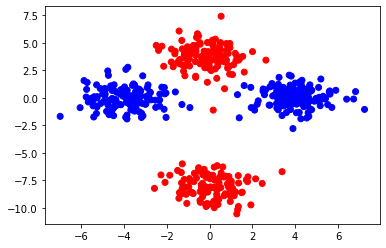

In [27]:
predictions = deep_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

# Congratulations...
... you've trained a nonlinear classifier with TensorFlow and Keras!